In [6]:
import cv2 
import matplotlib.pyplot as plt

In [7]:
frozenModule = 'config/frozen_inference_graph.pb'
configFile = 'config/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [8]:
model = cv2.dnn_DetectionModel(frozenModule , configFile)

<h5>05 - Set Up The Configuration</h5>

In [9]:
model.setInputSize(320 , 320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5 , 127.5 , 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001F49B12BDD0>

In [10]:
classLabels = []
fileName = 'data/labels.txt'
with open(fileName , 'rt') as fpt : 
    classLabels = fpt.read().rstrip('\n').split('\n')

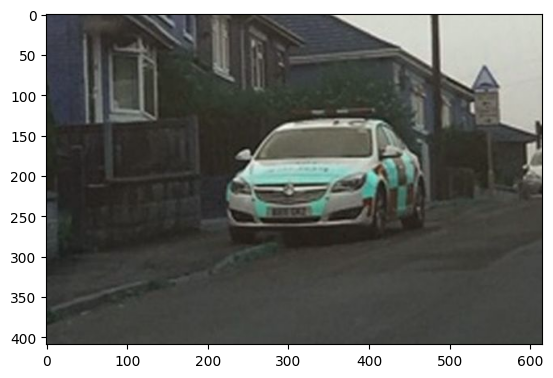

In [11]:
img = cv2.imread('images/carImage.png')
plt.imshow(img)

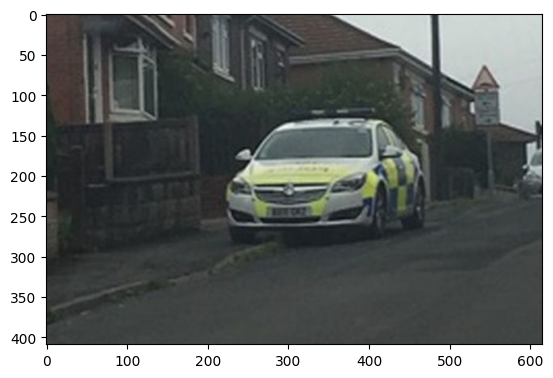

In [12]:

plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))

In [13]:
ClassIndex , confidence , bbox = model.detect(img , confThreshold = 0.7)

In [14]:
fontScale = 3
font = cv2.FONT_HERSHEY_PLAIN

for ClassInd , conf , boxes in zip (ClassIndex.flatten() , confidence.flatten() , bbox) : 
    cv2.rectangle(img , boxes ,(255 , 0 , 0) , 2)
    cv2.putText(img , classLabels[ClassInd-1] , (boxes[0] + 10 , boxes[1] + 40) , font , fontScale = fontScale , color = (0 , 255 , 0) , thickness = 3)


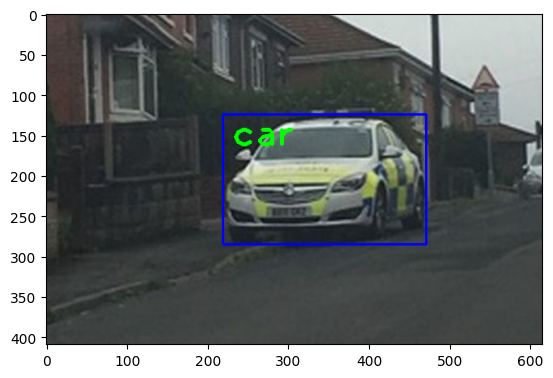

In [15]:
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))